In [7]:
import bz2
print("bz2 module is available.")

ModuleNotFoundError: No module named '_bz2'

In [6]:
from datasets import load_dataset

# Load Salesforce/wikitext
"""
 wikitext-2-raw-v1
 wikitext-2-v1
 wikitext-103-v1
 wikitext-103-raw-v1
"""
def load_wikitext():
    print("Loading Salesforce/wikitext dataset...")
    wikitext = load_dataset("wikitext", "wikitext-2-raw-v1")
    return wikitext

# Preprocessing function
def preprocess_wikitext(dataset):
    def process_text(example):
        # Basic preprocessing: lowercasing, stripping, and removing special tokens
        example["text"] = example["text"].lower().strip()
        return example

    print("Preprocessing Salesforce/wikitext dataset...")
    return dataset.map(process_text)



# Load and preprocess
#wikitext_dataset = load_wikitext()
#processed_wikitext = preprocess_wikitext(wikitext_dataset)


ModuleNotFoundError: No module named '_bz2'

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import bz2

def visualize_wikitext(dataset):
    # Check dataset structure
    print("\nDataset Structure:")
    print(dataset)

    # Print sample examples
    print("\nSample Examples:")
    for i, example in enumerate(dataset['train']['text'][:5]):  # Visualize first 5 samples
        print(f"Example {i+1}: {example}\n")
    
    # Analyze basic stats
    text_lengths = [len(text.split()) for text in dataset['train']['text']]
    print(f"Number of samples: {len(text_lengths)}")
    print(f"Average length: {sum(text_lengths) / len(text_lengths):.2f} words")
    print(f"Max length: {max(text_lengths)} words")
    print(f"Min length: {min(text_lengths)} words")

    # Visualize text length distribution
    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title("Text Length Distribution in WikiText Dataset")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

    # Generate word cloud for text
    combined_text = " ".join(dataset['train']['text'][:100])  # Combine first 100 examples
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of WikiText Dataset (First 100 Samples)")
    plt.show()

In [ ]:
wikitext_dataset = load_wikitext()
visualize_wikitext(wikitext_dataset)

In [8]:
from torchtext.datasets import WikiText103, WikiText2, wikitext2
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load WikiText103 dataset
def load_wikitext_torchtext():
    print("Loading WikiText103 dataset using torchtext...")
    train_iter = WikiText2(split='train')
    data = list(train_iter)
    return data

# Preprocess and tokenize data
def preprocess_and_tokenize(data):
    print("Preprocessing and tokenizing data...")
    tokenizer = get_tokenizer("basic_english")
    tokenized_data = [tokenizer(text.lower()) for text in data]
    return tokenized_data

# Build vocabulary
def build_vocab(tokenized_data):
    print("Building vocabulary...")
    counter = Counter([token for tokens in tokenized_data for token in tokens])
    vocab = Vocab(counter, specials=["<unk>", "<pad>", "<bos>", "<eos>"])
    return vocab

# Visualize data
def visualize_data(tokenized_data, vocab):
    # Word cloud visualization
    print("Generating word cloud...")
    combined_text = " ".join([" ".join(tokens) for tokens in tokenized_data[:100]])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of WikiText Dataset (First 100 Samples)")
    plt.show()

    # Vocabulary distribution
    print("Visualizing vocabulary distribution...")
    token_counts = [vocab.freqs[token] for token in vocab.itos[:50]]  # Frequency of top 50 tokens
    tokens = vocab.itos[:50]

    plt.figure(figsize=(12, 6))
    plt.bar(tokens, token_counts, color="blue")
    plt.xticks(rotation=45)
    plt.title("Top 50 Words in Vocabulary (by Frequency)")
    plt.xlabel("Tokens")
    plt.ylabel("Frequency")
    plt.show()

# Main function
if __name__ == "__main__":
    data = load_wikitext_torchtext()
    tokenized_data = preprocess_and_tokenize(data)
    vocab = build_vocab(tokenized_data)

    print(f"Number of tokens in the dataset: {sum(len(tokens) for tokens in tokenized_data)}")
    print(f"Vocabulary size: {len(vocab)}")
    visualize_data(tokenized_data, vocab)


OSError: /home/cimcon/Documents/projects/titans/py39_env/lib/python3.9/site-packages/torchtext/lib/libtorchtext.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs

In [9]:
!wget https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-raw-v1.zip


--2025-01-23 16:37:29--  https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-raw-v1.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.97.254, 52.216.251.38, 16.182.72.64, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.97.254|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-01-23 16:37:30 ERROR 403: Forbidden.



Loading data from /home/cimcon/Documents/projects/titans/datasets/train.txt...
Preprocessing and tokenizing data...
Building vocabulary...
Number of tokens in the dataset: 1749250
Vocabulary size: 28660
Generating word cloud...


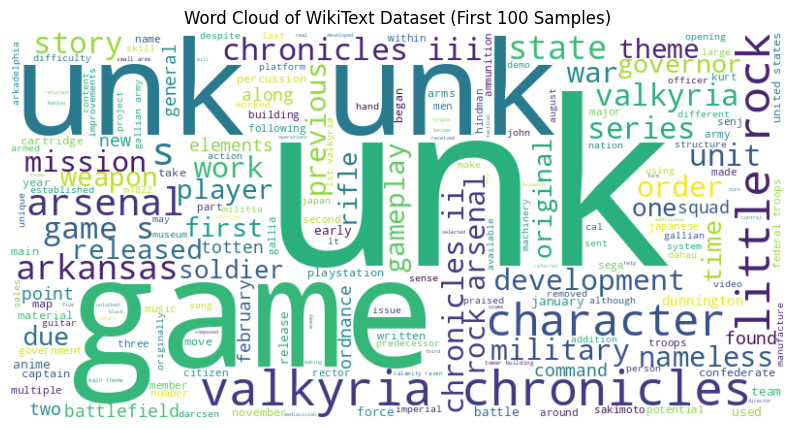

Visualizing vocabulary distribution...


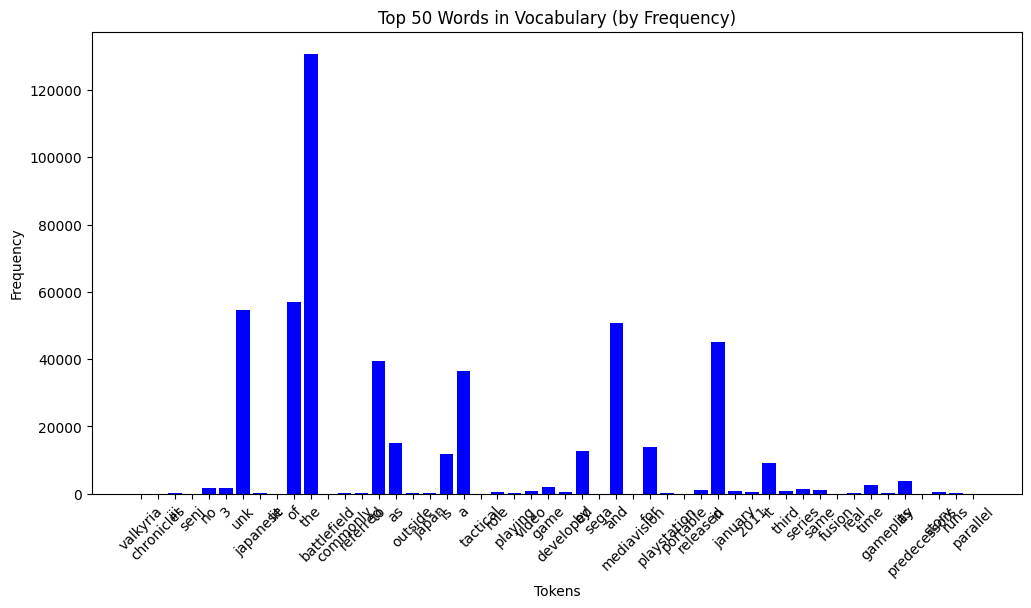

In [10]:
import re
import os
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load WikiText103 dataset manually
def load_wikitext_file(file_path):
    print(f"Loading data from {file_path}...")
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read().splitlines()
    return data

# Preprocess and tokenize data
def preprocess_and_tokenize(data):
    print("Preprocessing and tokenizing data...")
    tokenized_data = []
    for text in data:
        # Clean the text: convert to lowercase, remove non-alphanumeric characters
        text = re.sub(r"[^a-zA-Z0-9\s]", "", text.lower())
        tokenized_data.append(text.split())
    return tokenized_data

# Build vocabulary
def build_vocab(tokenized_data):
    print("Building vocabulary...")
    counter = Counter([token for tokens in tokenized_data for token in tokens])
    vocab = {token: count for token, count in counter.items()}
    return vocab

# Visualize data
def visualize_data(tokenized_data, vocab):
    # Word cloud visualization
    print("Generating word cloud...")
    combined_text = " ".join([" ".join(tokens) for tokens in tokenized_data[:100]])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of WikiText Dataset (First 100 Samples)")
    plt.show()

    # Vocabulary distribution
    print("Visualizing vocabulary distribution...")
    top_tokens = list(vocab.items())[:50]  # Top 50 most frequent tokens
    tokens, counts = zip(*top_tokens)

    plt.figure(figsize=(12, 6))
    plt.bar(tokens, counts, color="blue")
    plt.xticks(rotation=45)
    plt.title("Top 50 Words in Vocabulary (by Frequency)")
    plt.xlabel("Tokens")
    plt.ylabel("Frequency")
    plt.show()

# Main function
if __name__ == "__main__":
    # Set the path to your downloaded WikiText103 file
    file_path = '/home/cimcon/Documents/projects/titans/datasets/train.txt'  # Adjust the path to your file

    data = load_wikitext_file(file_path)
    tokenized_data = preprocess_and_tokenize(data)
    vocab = build_vocab(tokenized_data)

    print(f"Number of tokens in the dataset: {sum(len(tokens) for tokens in tokenized_data)}")
    print(f"Vocabulary size: {len(vocab)}")
    visualize_data(tokenized_data, vocab)


In [ ]:
from datatrove.pipeline.readers import ParquetReader

# limit determines how many documents will be streamed (remove for all)
# to fetch a specific dump: hf://datasets/HuggingFaceFW/fineweb/data/CC-MAIN-2024-10
# replace "data" with "sample/100BT" to use the 100BT sample
data_reader = ParquetReader("hf://datasets/HuggingFaceFW/fineweb/data", limit=1000) 
for document in data_reader():
    # do something with document
    print(document)

###############################    
# OR for a processing pipeline:
###############################

from datatrove.executor import LocalPipelineExecutor
from datatrove.pipeline.readers import ParquetReader
from datatrove.pipeline.filters import LambdaFilter
from datatrove.pipeline.writers import JsonlWriter

pipeline_exec = LocalPipelineExecutor(
    pipeline=[
        # replace "data/CC-MAIN-2024-10" with "sample/100BT" to use the 100BT sample
        ParquetReader("hf://datasets/HuggingFaceFW/fineweb/data/CC-MAIN-2024-10", limit=1000),
        LambdaFilter(lambda doc: "hugging" in doc.text),
        JsonlWriter("some-output-path")
    ],
    tasks=10
)
pipeline_exec.run()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datatrove.pipeline.readers import ParquetReader
from datatrove.pipeline.filters import LambdaFilter
from typing import List, Dict
import re
import json

class FineWebPreprocessor:
    def __init__(self, dataset_path: str, limit: int = 10000):
        """
        Initialize FineWeb dataset preprocessor
        
        Args:
            dataset_path (str): Path to FineWeb dataset
            limit (int): Number of documents to process
        """
        self.dataset_path = dataset_path
        self.limit = limit
        self.documents = []
    
    def load_documents(self):
        """Load documents from Parquet dataset"""
        reader = ParquetReader(self.dataset_path, limit=self.limit)
        self.documents = list(reader())
    
    def basic_preprocessing(self) -> List[Dict]:
        """
        Perform basic text preprocessing
        
        Returns:
            List of processed document dictionaries
        """
        processed_docs = []
        for doc in self.documents:
            # Basic text cleaning
            text = doc.text
            text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
            text = text.strip()
            
            processed_docs.append({
                'text': text,
                'length': len(text),
                'word_count': len(text.split()),
                'language': doc.metadata.get('language', 'unknown'),
                'source': doc.metadata.get('source', 'unknown')
            })
        
        return processed_docs
    
    def analyze_text_statistics(self, processed_docs: List[Dict]):
        """
        Analyze text statistics and create visualizations
        
        Args:
            processed_docs (List[Dict]): Preprocessed documents
        """
        # Convert to DataFrame for easier analysis
        df = pd.DataFrame(processed_docs)
        
        # Language distribution
        plt.figure(figsize=(15, 10))
        
        # Subplot 1: Language Distribution
        plt.subplot(2, 2, 1)
        df['language'].value_counts().head(10).plot(kind='bar')
        plt.title('Top 10 Languages')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Subplot 2: Document Length Distribution
        plt.subplot(2, 2, 2)
        df['length'].hist(bins=50)
        plt.title('Document Length Distribution')
        plt.xlabel('Document Length (chars)')
        plt.ylabel('Frequency')
        
        # Subplot 3: Word Count Distribution
        plt.subplot(2, 2, 3)
        df['word_count'].hist(bins=50)
        plt.title('Word Count Distribution')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')
        
        # Subplot 4: Box Plot of Length by Language
        plt.subplot(2, 2, 4)
        df.boxplot(column='length', by='language', rot=90)
        plt.title('Document Length by Language')
        plt.suptitle('FineWeb Dataset Analysis')
        
        plt.tight_layout()
        plt.savefig('fineweb_analysis.png')
        plt.close()
        
        # Generate summary statistics
        summary_stats = {
            'total_documents': len(df),
            'language_distribution': df['language'].value_counts(normalize=True).head(10).to_dict(),
            'length_stats': {
                'mean': df['length'].mean(),
                'median': df['length'].median(),
                'min': df['length'].min(),
                'max': df['length'].max()
            },
            'word_count_stats': {
                'mean': df['word_count'].mean(),
                'median': df['word_count'].median(),
                'min': df['word_count'].min(),
                'max': df['word_count'].max()
            }
        }
        
        # Save summary to JSON
        with open('fineweb_summary.json', 'w') as f:
            json.dump(summary_stats, f, indent=2)
        
        return summary_stats
    
    def run_pipeline(self):
        """Execute full preprocessing and analysis pipeline"""
        self.load_documents()
        processed_docs = self.basic_preprocessing()
        return self.analyze_text_statistics(processed_docs)

# Example usage
preprocessor = FineWebPreprocessor(
    "hf://datasets/HuggingFaceFW/fineweb/data", 
    limit=10000
)
summary = preprocessor.run_pipeline()
print(json.dumps(summary, indent=2))



import json
import re
import os
from datatrove.pipeline.readers import ParquetReader
from datatrove.pipeline.writers import JsonlWriter
from datatrove.pipeline.filters import LambdaFilter
from datatrove.executor import LocalPipelineExecutor

def ensure_directory(file_path):
    """Create directory if it doesn't exist"""
    directory = os.path.dirname(file_path)
    if directory and not os.path.exists(directory):
        os.makedirs(directory)

def create_robust_pipeline(output_path):
    """Create a flexible DataTrove processing pipeline"""
    # Ensure directory exists
    ensure_directory(output_path)
    
    pipeline = LocalPipelineExecutor(
        pipeline=[
            # Read FineWeb dataset
            ParquetReader(
                "hf://datasets/HuggingFaceFW/fineweb/data/CC-MAIN-2024-10", 
                limit=50000
            ),
            
            # Comprehensive filtering
            LambdaFilter(lambda doc: (
                # Ensure document has text
                doc.text and 
                
                # Language check (assuming language in metadata)
                doc.metadata.get('language', '').lower() == 'en' and
                
                # Length filtering
                100 < len(doc.text) < 50000 and
                
                # Special character ratio filter
                len(re.findall(r'[^a-zA-Z\s]', doc.text)) / len(doc.text) < 0.3 and
                
                # Content quality keywords
                any(keyword in doc.text.lower() for keyword in [
                    'technology', 'science', 'research', 'innovation', 
                    'learning', 'development', 'progress'
                ])
            )),
            
            # Write processed documents
            JsonlWriter(output_path)
        ],
        tasks=10  # Parallel processing
    )
    
    return pipeline

def analyze_processing_results(output_path):
    """Analyze processed documents"""
    os.makedirs(os.path.dirname(output_path) or '.', exist_ok=True)
    
    # Open the file to ensure it can be created
    with open(output_path, 'w') as f:
        pass
    processed_docs = []
    with open(output_path, 'r') as f:
        for line in f:
            processed_docs.append(json.loads(line))
    
    # Basic analysis
    summary = {
        'total_processed_docs': len(processed_docs),
        'average_doc_length': sum(len(doc['text']) for doc in processed_docs) / len(processed_docs),
        'sample_documents': [
            doc['text'][:200] + '...' for doc in processed_docs[:5]
        ]
    }
    
    return summary

# Main execution
output_path = 'processed_fineweb.jsonl'
# pipeline = create_robust_pipeline(output_path)
# pipeline.run()

# Analyze results
summary = analyze_processing_results(output_path)
print(json.dumps(summary, indent=2))